# LSTM-1

* using sum as normalization
* all 9 feature vectors are considered

In [2]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import random
import pandas as pd
import keras
from keras import layers
import utils as ut
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = ut.data1()

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)


In [4]:
dg = df.sample(100)

fc = [str(e) for e in range(1,10)]
dx = dg[fc]
x = dx.to_numpy()

dy = dg[['e']]
y = dy.to_numpy()

#dy = pd.get_dummies(dg['e'],prefix='e')
#y = .to_numpy()

In [5]:
x.shape, y.shape

((100, 9), (100, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

In [7]:
X_train.shape, y_train.shape

((67, 9), (67, 1))

In [8]:
X_test.shape, y_test.shape

((33, 9), (33, 1))

In [9]:
class M1:
    
    def __init__(self, n_input, n_units, n_output): 
        
        self.n_input = n_input
        self.n_units = n_units
        self.n_output = n_output
        self.comment = None

    def setcomment(self, msg):
        
        self.comment = msg
        
    def setmodel(self):

        model = Sequential()
        inputs = Input(shape=(1,n_input))
        model.add(inputs)

        #lstm = LSTM(n_units, input_shape=(1,5))
        lstm = LSTM(self.n_units, return_sequences=True, name="l1")
        model.add(lstm)

        lstm = LSTM(5, return_sequences=True, name="l2")
        model.add(lstm)

        dense = Dense(10, activation='softmax', name="l3")
        model.add(dense)

        dense = Dense(self.n_output, activation='softmax', name="l4")
        model.add(dense)

        return model

In [10]:
n_input = 9
n_output = 1
n_units = 9

m = M1(n_input, n_units, n_output)
mm = m.setmodel()
mm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

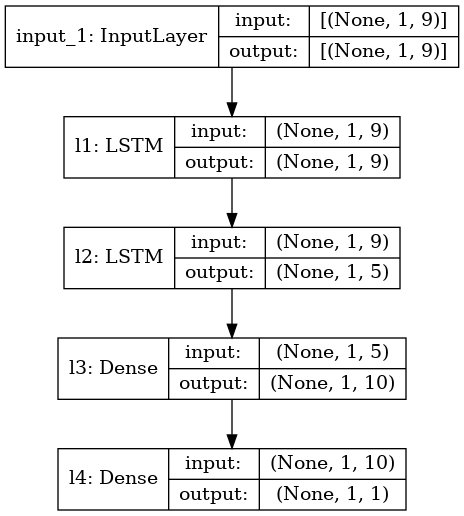

In [11]:
ut.fpm(mm)

In [12]:
xr = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
yr = y_train.reshape((y_train.shape[0], 1, 1))

In [13]:
xr.shape, yr.shape

((67, 1, 9), (67, 1, 1))

In [14]:
hist = mm.fit(xr, yr, epochs=100, batch_size=5, verbose=1,)

Epoch 1/100
14/14 [==============================] - 7s 6ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.2388
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss:

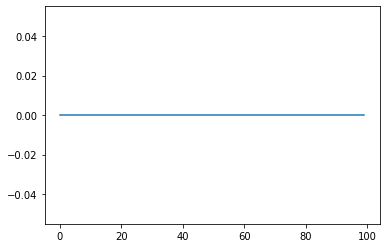

In [15]:
plt.plot(hist.history['loss'])

In [16]:
xr = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
mm.predict(xr)

array([[[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]]], dtype=float32)